<a href="https://colab.research.google.com/github/SebastianLealT/OPTIMIZACION-1/blob/main/Optimizaci%C3%B3n_en_varias_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Métodos de optimización: Funciones de varias variables*
##Johan Sebastian Leal Toro
##Curso de Optimización I
##Universidad del Valle, Cali

En este cuaderno nos centraremos en estudiar los siguientes métodos para el cálculo de mínimos de funciones multivariables:
1. Método de Nelder-Mead
2. Método del Gradiente (máximo descenso)
3. Método del Gradiente Conjugado
4. Método de

Para ello Importamos los siguientes paquetes:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

##Función a evaluar y algunos cálculos manuales

Definimos la función multivariable con la que se quiere trabajar, en este caso será:

$$f(x,y)=(x+2y-7)^{2}+(2x+y-5)^{2}$$

la cual es conocida como *Booth Function*.

Seguidamente delimitamos el dominio de la función en donde se llevará a cabo el proceso de minimización:

In [37]:
#Se establecen las cotas para los ejes x e y respectivamente
x_min, x_max = -10, 10
y_min, y_max = -10, 10

Habiendo restringido el dominio, es necesario crear una lista de puntos (particiones) para cada eje, de esta manera será posible crear la malla donde se mostrará nuestra gráfica.

In [38]:
#Partición para el eje x con 100 puntos
xx = np.linspace(x_min,x_max,100)
#Partición para el eje y con 100 puntos
yy = np.linspace(y_min,y_max,100)

#Creamos la malla de pares (x,y) que me cubre todos los puntos sobre el dominio definido
X, Y = np.meshgrid(xx, yy)

Se deifine ahora la función Booth tomando a $x$ como una lista de dos elementos, el primero corresponde a la componente en el eje $x$ y el segundo corresponde a la componente en el eje $y$.

In [39]:
def booth(x):
  return ((x[0] + (2*x[1]) -7)**2) + (((2*x[0]) + x[1] - 5)**2)

Graficamos las curvas de nivel de nuestra función, evaluandola en cada punto de la malla.

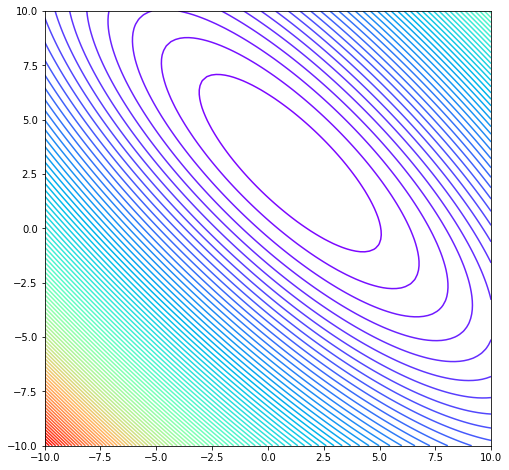

In [40]:
#Se crea la lista de puntos resultantes al evaluar la función
Z = booth([X, Y])

#Creamos la imagen y mostramos la gráfica
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
plt.show()

Para algunos métodos aplicados en este cuaderno será necesario conocer el gradiente, el jacobiano o la Hessiana de la función en cuestión, para ello realizamos algunos cálculos manuales y definimos cada una de estas operaciones. Iniciaremos por definir el gradiente de la función Booth como:

$$\nabla f(x,y) = \langle 2(x+2y-7)+4(2x+y-5), 4(x+2y-7)+2(2x+y-5)\rangle$$

In [41]:
#Se define el gradiente
def Df(x):
  return np.array([(2*(x[0] + (2*x[1]) -7)) + (4*((2*x[0]) + x[1] - 5)) , (4*(x[0] + (2*x[1]) -7)) + (2*((2*x[0]) + x[1] - 5))])

Seguidamente podemos definir el jacobiano de nuestra función:

$$J(x,y)=\begin{bmatrix} 2(x+2y-7)+4(2x+y-5)\\ 4(x+2y-7)+2(2x+y-5)\end{bmatrix}$$

In [42]:
#Se define el jacobiano
def Jf(x):
  der = np.zeros_like(x)
  der[0]= (2*(x[0] + (2*x[1]) -7)) + (4*((2*x[0]) + x[1] - 5))
  der[1]= (4*(x[0] + (2*x[1]) -7)) + (2*((2*x[0]) + x[1] - 5))
  return der

Por último hacemos el cálculo de la Hessiana y definimos la función en el código:

$$H(x,y)=\begin{bmatrix} 10& 8\\ 8& 10\end{bmatrix}$$

In [43]:
#Se define la Hessiana
def Hf(x):
  x = np.asarray(x)
  H = np.diag([10 , 10 ])
  H[1,0]= 8
  H[0,1]= 8
  return H

##Método de Nelder-Mead

Este método toma $n+1$ puntos en $n$ dimensiones y busca de manera aproximada una solución óptima local al problema cuando la función a minimizar varía suavemente. A estos $n+1$ puntos se les conoce como un *Simplex* que va cambiando con cada iteración del método aplicado, pues en cada paso este se encarga de cambiar el punto mas lejano al mínimo por uno que se encuentre mas cerca de este.

Dado que la gráfica de la función a evaluar vive en $\mathbb{R}^{2}$, el simplex a tomar en cada paso debe tener 3 puntos. Nos vemos entonces interesados en conocer el simplex en la última iteración realizada por el programa, también la evaluación de la función en estos 3 puntos. Definimos entonces una función que nos guarde los datos para cada iteración, a esta la llamaremos *store*. Definimos también el punto donde se quiere iniciar el programa.

In [64]:
#Punto inicial para la evaluación
x0=[8,-8]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
liX = [x0[0]]
liY = [x0[1]]
liF = [booth(x0)]

#Función store
def store(X):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(booth(X))

Aplicamos ahora el comando *Optimize* para el método de Nelder-Mead, el cual nos dará los resultados en este orden:
1. Simplex final y evaluación de la función en esos puntos.
2. (fun) Evaluación de la función en el punto encontrado.
3. (message) Indica si la optimización se realizó exitosamente.
4. (nfev) Número de evaluaciones en la función realizadas por el método
5. (nit) Cantidad de iteraciones
6. Indica si el método terminó o no.
7. (success) Indica si el proceso llegó o no al mínimo de la función.
8. (x) Es el último punto donde se evaluó la función, el mínimo.

In [65]:
optimize.minimize(booth, x0, method="Nelder-Mead", callback=store, options={"xtol": 1e-10})

 final_simplex: (array([[1., 3.],
       [1., 3.],
       [1., 3.]]), array([2.96677909e-21, 5.18461483e-21, 8.97235775e-21]))
           fun: 2.9667790859112864e-21
       message: 'Optimization terminated successfully.'
          nfev: 183
           nit: 95
        status: 0
       success: True
             x: array([1., 3.])

Gráficamente el cambio de cada punto en el simplex por uno mas óptimo en cada iteración se puede ver en la siguiente gráfica:

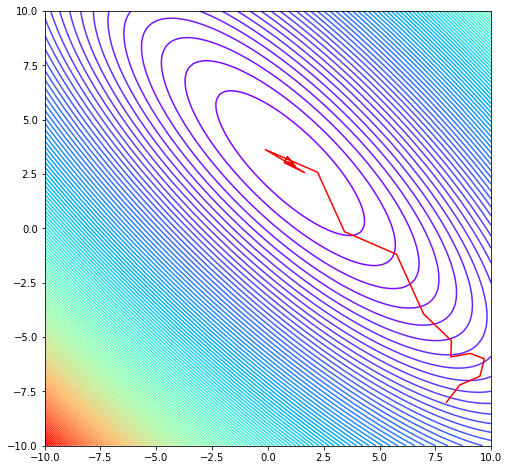

In [66]:
#Graficamos nuevamente las curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow")
#Se raliza la gráfica de los puntos guardados por la función store para  x e y
plt.plot(liX,liY, color='red')

plt.show()

###Error Absoluto

Dado que el valor teórico del mínimo de esta función es $f(1, 3)=0$ podemos calcular el error absoluto para cada evaluación de la función en cada iteración.

In [67]:
#Error en cada iteración
ErrorNM = abs(np.array(liF)-0)
ErrorNM

array([2.34000000e+02, 1.88840000e+02, 1.75050000e+02, 1.57050000e+02,
       1.57050000e+02, 1.57050000e+02, 1.43457031e+02, 1.43457031e+02,
       1.43001143e+02, 1.22459524e+02, 1.22459524e+02, 8.72392578e+01,
       8.72392578e+01, 4.15848560e+01, 1.79383038e+01, 4.26557922e+00,
       2.56682861e+00, 2.56682861e+00, 7.85461991e-01, 7.85461991e-01,
       3.11108423e-01, 2.28960021e-01, 1.00605664e-01, 2.71082151e-02,
       2.71082151e-02, 1.79239401e-02, 1.22361297e-02, 4.44414413e-03,
       1.46992563e-03, 5.20911767e-04, 5.16177880e-04, 2.16355041e-04,
       6.44509710e-05, 5.34526229e-05, 3.50890989e-05, 9.14705994e-06,
       3.80989266e-06, 3.80989266e-06, 1.90349075e-06, 1.17490137e-06,
       2.00499777e-07, 2.00499777e-07, 2.00499777e-07, 1.32970015e-07,
       1.29294419e-08, 1.29294419e-08, 1.29294419e-08, 1.09506824e-08,
       7.81090259e-09, 3.69908817e-10, 3.69908817e-10, 3.69908817e-10,
       3.69908817e-10, 1.76601486e-10, 6.21541061e-11, 5.42817542e-11,
      

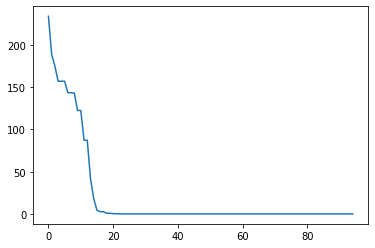

In [68]:
#Gráfica del error
plt.plot(ErrorNM)

##Método del Gradiente (máximo descenso)

Este método aplica reducciones sucesivas de un punto sobre la función dada en dirección opuesta del gradiente, pues este se sabe que siempre apunta hacia el máximo valor (local) de la función. La transición de un punto $x_{k}$ a un punto $x_{k+1}$ viene dada por la siguiente expresión:
$$x_{k+1}=x_{k}-\alpha_{k}\nabla f(x_{k})$$
donde $\alpha_{k}$ es la longitud de paso desde el punto $x_{k}$ al punto $x_{k+1}$ y $\nabla f(x_{k})$ es la dirección de búsqueda del máximo descenso.

Definimos entonces la función que nos guardará las listas de puntos en cada iteración y aplicará en general este método de optimización:

In [69]:
#Se definen las listas vacías para los puntos de x, y y las evaluaciones de la función
lisX=[]
lisY=[]
lisF=[]

#Definimos la función del máximo descenso con un punto inicial x1, la función a trabajar y su gradiente Df
def gradient_descent(x1, booth, Df):
  x_i, y_i = x1
  for i in range(1,100):
    lisX.append(x_i)
    lisY.append(y_i)
    lisF.append(booth([x_i,y_i]))
    dx_i, dy_i= Df([x_i,y_i])
    #Aplicamos el comando optimize para encontrar el parámetro alpha requerido
    alpha = optimize.line_search(booth, Df, np.array([x_i,y_i]), -np.array([dx_i, dy_i])) [0]
    #En caso de que no exista tal parámetro mostramos que no se encontró un alpha óptimo
    if alpha == None:
      print('No se encontró alpha óptimo')
      break
    #Se definen los nuevos valores para x_i y y_i con el producto del parámetro alpha y las componentes del gradiente
    x_i += - alpha*dx_i
    y_i += - alpha*dy_i
    #Se da una tolerancia al programa para que realice las iteraciones hasta cierto punto
    if np.abs(lisF[-1]) < 1e-16:
      break

Graficamos nuevamente las curvas de nivel de nuestra función junto con el camino realizado en cada iteración, para ello iniciamos nuestras listas de puntos vacías y damos un punto inicial para empezar a evaluar:

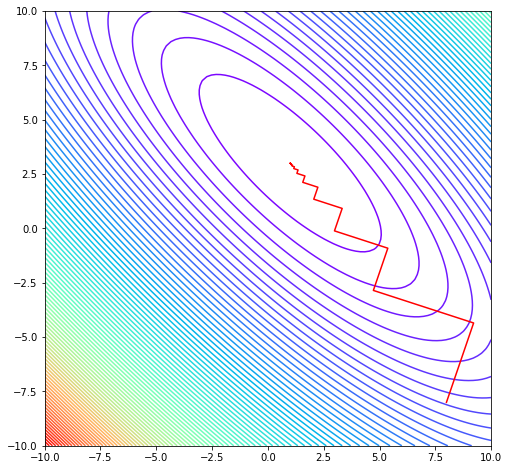

In [70]:
#Listas de puntos
lisX=[]
lisY=[]
lisF=[]
#Punto inicial
x1 = [8, -8]
#Se evalúa la función de descenso
gradient_descent(x1, booth, Df)

#Curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 100, cmap="rainbow")
#Camino de las iteraciones aplicadas por el método
plt.plot(lisX,lisY, color='red')
plt.show()

Nos vemos interesados en saber cuál fue el punto mínimo encontrado, este lo podemos obtener fácilmente de las listas creadas, la última posición en cada una definirá nuestro punto mínimo:

In [71]:
print('El mínimo de la función dada se encuentra en el punto', [ lisX[-1], lisY[-1]])
print('La función evaluada en el punto mínimo tiene valor de f(x,y)=', lisF[-1])

El mínimo de la función dada se encuentra en el punto [1.0000000045065693, 2.999999992837312]
La función evaluada en el punto mínimo tiene valor de f(x,y)= 9.9833139784208e-17


###Error Absoluto

Dado que conocemos el valor teórico de la función evaluada en su punto mínimo (en esta caso es cero) podemos calcular y graficar el error absoluto obtenido al evaluar la función en cada iteración, así:

In [72]:
#Error en cada iteración
ErrorDG = abs(np.array(lisF)-0)
ErrorDG

array([2.34000000e+02, 1.24540541e+02, 6.62835309e+01, 3.52777212e+01,
       1.87756687e+01, 9.99287148e+00, 5.31845135e+00, 2.83061028e+00,
       1.50652023e+00, 8.01807027e-01, 4.26741370e-01, 2.27122226e-01,
       1.20880020e-01, 6.43353123e-02, 3.42408315e-02, 1.82238105e-02,
       9.69915903e-03, 5.16220654e-03, 2.71000717e-03, 1.42267436e-03,
       7.46862349e-04, 3.92080849e-04, 2.05830957e-04, 1.08055221e-04,
       5.67258248e-05, 2.97793958e-05, 1.56333102e-05, 8.20702978e-06,
       4.30845015e-06, 2.26181008e-06, 1.18738402e-06, 6.23341816e-07,
       3.27236188e-07, 1.71789410e-07, 9.01844065e-08, 4.73441708e-08,
       2.48543024e-08, 1.30477805e-08, 6.84970242e-09, 3.59589306e-09,
       1.88773849e-09, 9.91007393e-10, 5.20241590e-10, 2.73107258e-10,
       1.43371033e-10, 7.52643975e-11, 3.95109765e-11, 2.07417759e-11,
       1.08886518e-11, 5.71613247e-12, 3.00075445e-12, 1.57528317e-12,
       8.26964385e-13, 4.34125183e-13, 2.27899132e-13, 1.19638335e-13,
      

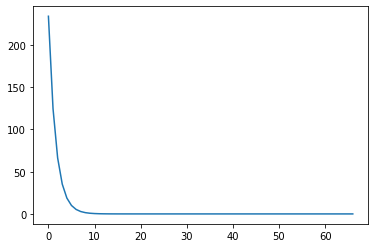

In [73]:
#Gráfica del error
plt.plot(ErrorDG)

##Método del Gradiente Conjugado (CG)

Este es un método similar al del máximo descenso solo que la transición de un punto $x_{k}$ a un punto $x_{k+1}$ viene dada por la siguiente expresión:
$$x_{k+1}=x_{k}+\alpha_{k} d_{k}$$
donde $\alpha_{k}$ es la longitud de paso desde el punto $x_{k}$ al punto $x_{k+1}$ y $d_{k}$, que denota la dirección, es un vector conjugado respecto a la matriz Hessiana de nuestra función. Lo que hace el método es calcular la nueva dirección de búsqueda utilizando una combinación lineal del gradiente en la etapa considerada y el de la etapa anterior.

Realizamos el mismo proceso que para el método del Nelder Mead, creamos de nuevo la función store, en este caso la llamaremos storeCG para guardar los datos de puntos en x, y y la función evaluada en cada punto en diferentes listas, así:

In [74]:
#Punto inicial para la evaluación
x2=[8,-8]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
listX = [x2[0]]
listY = [x2[1]]
listF = [booth(x2)]

#Función store
def storeCG(X1):
    global listX
    global listY
    global listF
    x, y = X1
    listX.append(x)
    listY.append(y)
    listF.append(booth(X1))

Aplicamos ahora el comando Optimize para el método de CG, el cual nos dará los resultados en este orden:

1. (fun) Evaluación de la función en el punto encontrado.
2. (jac) 
3. (message) Indica si la optimización se realizó exitosamente.
4. (nfev) Número de evaluaciones en la función realizadas por el método.
5. (nit) Cantidad de iteraciones.
6. (njev)
7. Indica si el método terminó o no.
8. (success) Indica si el proceso llegó o no al mínimo de la función.
9. (x) Es el último punto donde se evaluó la función, el mínimo.

In [75]:
optimize.minimize(booth, x2, method="CG", callback=storeCG, options={"xtol": 1e-10})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: xtol
  """Entry point for launching an IPython kernel.


     fun: 1.200235060175396e-11
     jac: array([ 7.30363076e-06, -2.36431289e-06])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 13
    njev: 21
  status: 0
 success: True
       x: array([1.00000255, 2.99999772])

Gráficamente, el camino de puntos elegidos por el método en cada iteración se pueden ver ce la siguiente manera:

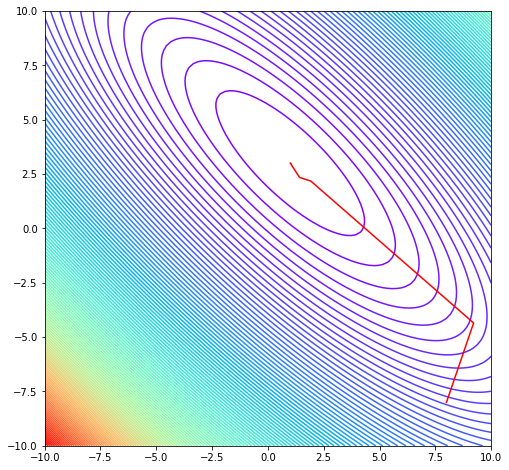

In [76]:
#Graficamos nuevamente las curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow")
#Se raliza la gráfica de los puntos guardados por la función storeCG para  x e y
plt.plot(listX,listY, color='red')

plt.show()

### Error Absoluto

Al igual que en los otros métodos podemos calculary graficar el error generado en cada evalución de la función por cada iteración:

In [77]:
#Error en cada iteración
ErrorCG = abs(np.array(listF)-0)
ErrorCG

array([2.34000000e+02, 1.24540541e+02, 1.57074804e+00, 8.36052657e-01,
       1.05710321e-02, 5.62657992e-03, 7.11423893e-05, 3.78668323e-05,
       4.78902943e-07, 2.54905999e-07, 3.22468147e-09, 1.71838618e-09,
       2.25092295e-11, 1.20023506e-11])

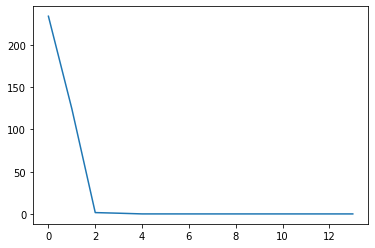

In [78]:
#Gráfica del error
plt.plot(ErrorCG)

##Método de Newton CG

Este método aproxima a la función dada de la siguiente manera:
$$f(x)\approx f(x_{k}) + \nabla f^{T}(x_{k}) (x-x_{k}) + \frac{1}{2} (x-x_{k})^{T} H_{f} (x_{k}) (x-x_{k})$$
donde $x_{k}$ es un punto dado sobre la función y $H_{f}$ es la matriz Hessiana de la función dada. Al derivar esta aproximación e igualarla a cero se puede despejar fácilmente el valor de $x$ al que llamaremos $x_{k+1}$ y por tanto nuestra transición de un punto $x_{k}$ a un punto $x_{k+1}$ viene dada por la expresión:
$$x_{k+1}=x_{k}-H^{-1}_{f} (x_{k})\nabla f^{T} (x_{k})$$

Al igual que el método anterior, es necesario definir una función que nos guarde los datos de x, y y las evaluaciones de la función en listas diferentes para cada iteración, llamaremos a esta función storeNCG:

In [79]:
#Punto inicial para la evaluación
x3=[8,-8]

#Listas de los puntos en x, y y las evaluaciones de la función en cada iteración
listaX = [x3[0]]
listaY = [x3[1]]
listaF = [booth(x3)]

#Función store
def storeNCG(X2):
    global listaX
    global listaY
    global listaF
    x, y = X2
    listaX.append(x)
    listaY.append(y)
    listaF.append(booth(X2))

Aplicamos ahora el comando Optimize para el método de Newton-CG, el cual nos dará los resultados en este orden en las primeras cinco líneas y la última:

1. El valor mínimo en la función encontrado.
2. El número de iteraciones realizadas.
3. La cantidad de evaluaciones en la función.
4. La cantidad de evaluaciones del gradiente.
5. La cantidad de evaluaciones en la Hessiana.
6. (x) El punto (x,y) encontrado que minimiza la función.

In [80]:
listaX=[]
listaY=[]
listaF=[]
optimize.minimize(booth, x3, jac=Jf, hess=Hf, method="Newton-CG", callback=storeNCG, options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 8
         Hessian evaluations: 4


     fun: 0.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 4
     nit: 4
    njev: 8
  status: 0
 success: True
       x: array([1., 3.])

Graficamos nuevamente las curvas de nivel de nuestra función y el camino generado por los puntos elegidos en el método hasta llegar al mínimo en cada iteración:

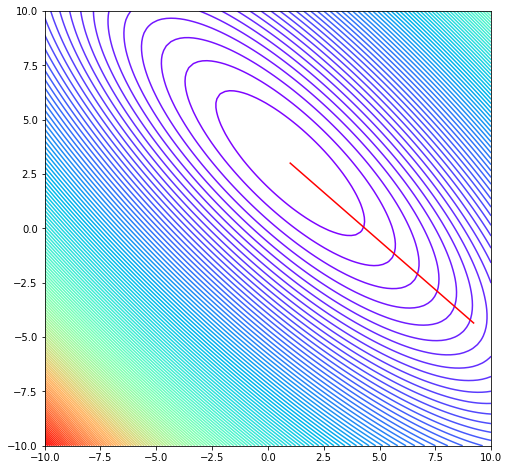

In [81]:
#Graficamos nuevamente las curvas de nivel de la función
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow")
#Se raliza la gráfica de los puntos guardados por la función storeCG para  x e y
plt.plot(listaX,listaY, color='red')

plt.show()

### Error Absoluto

Calculamos el error en las evaluaciones de la función para cada iteración y realizamos su gráfica:

In [82]:
#Error en cada iteración
ErrorNCG = abs(np.array(listaF)-0)
ErrorNCG

array([124.54054054,   1.57074799,   0.        ,   0.        ])

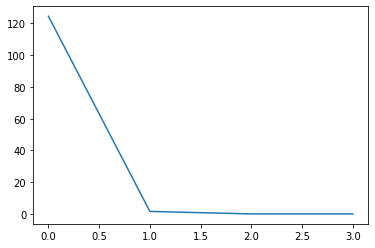

In [83]:
#Gráfica del error
plt.plot(ErrorNCG)

##Comparación de Errores

Realizamos las gráficas del error absoluto de cada uno de los métodos y comparamos para sacar conclusiones:

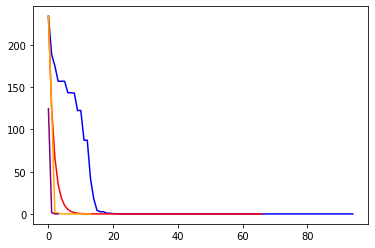

In [89]:
#Error en Nelder-Mead en azul
plt.plot(ErrorNM, color='blue') #%%%%%%%%%
#Error en Máximo descenso en rojo
plt.plot(ErrorDG, color='red')
#Error en Gradiente Conjugado en naranja
plt.plot(ErrorCG, color='orange') #%%%%%%%%%
#Error en Newton CG en púrpura
plt.plot(ErrorNCG, color='purple')

##Conclusiones

La convergencia de cada método siguiente es más rápida que la del anterior, esto se debe a la forma en como se abarcan los cálculos en cada uno de ellos. Por consiguiente el método mas óptimo de los cuatro presentes es el de Newton-CG esto se puede concluir de las gráficas del error y se debe a que los cálculos a partir de la Hessiana y el Jacobiano de la función terminan siendo mas precisos que realizar reflexiones de un punto, o solamente dirigirse en dirección contraria al gradiente. Aún así, los métodos del máximo descenso y el gradiente conjugado siguen siendo muy superiores al método de Nelder-Mead y basta con analizar las gráficas del error dadas.

##Referencias

1. Heath, M. T. (2018). Scientific Computing: An Introductory Survey, Revised Second Edition. Society for Industrial and Applied Mathematics.
2. Chong, E. K., & Zak, S. H. (2004). An introduction to optimization. John Wiley & Sons.